## Explanatory Data Analysis 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read the data
ES_EZ = pd.read_csv('/Users/gaojinglun/Desktop/RSG/data/ES_EZ_old.csv')
df = ES_EZ[['Put.Call', 'Strike.Price', 'Settlement', 'Historical Vol', 'futures.price', 
            'Time.to.maturity', 'Risk.Free.Rate', 'Open.Interest', 'Implied.Volatility']]

# Drop the obserbation with 0 settlement
df = df.drop(df.index.values[df['Settlement'] == 0], axis = 0)
assert sum(df['Settlement'] == 0) == 0, 'option price equals to 0'

# Drop the Null values
df = df.dropna()
df.head()

,Put.Call,Strike.Price,Settlement,Historical Vol,futures.price,Time.to.maturity,Risk.Free.Rate,Open.Interest,Implied.Volatility
0,C,2200,1059.0,0.008335,3259.0,0.213699,0.0154,826.0,0.338267
1,C,2250,1009.1,0.008335,3259.0,0.213699,0.0154,728.0,0.326829
2,C,2270,989.1,0.008335,3259.0,0.213699,0.0154,1.0,0.323456
3,C,2300,959.2,0.008335,3259.0,0.213699,0.0154,212.0,0.317834
4,C,2310,949.2,0.008335,3259.0,0.213699,0.0154,42.0,0.314282


In [7]:
# Calculate the Strike price to underlying asset price ratio in 100%
temp = 100 * df['Strike.Price'].values / df['futures.price'].values

print('The mean value of strike to underlying asset ratio is', np.round(np.mean(temp), 4))
print('The standard deviation of strike to underlying asset ratio is', np.round(np.std(temp), 4))
print('The minimum value of strike to underlying asset ratio is', np.round(np.min(temp), 4))
print('The maximum value of strike to underlying asset ratio is', np.round(np.max(temp), 4))

The mean value of strike to underlying asset ratio is 88.9256
The standard deviation of strike to underlying asset ratio is 23.5068
The minimum value of strike to underlying asset ratio is 3.1227
The maximum value of strike to underlying asset ratio is 184.7575


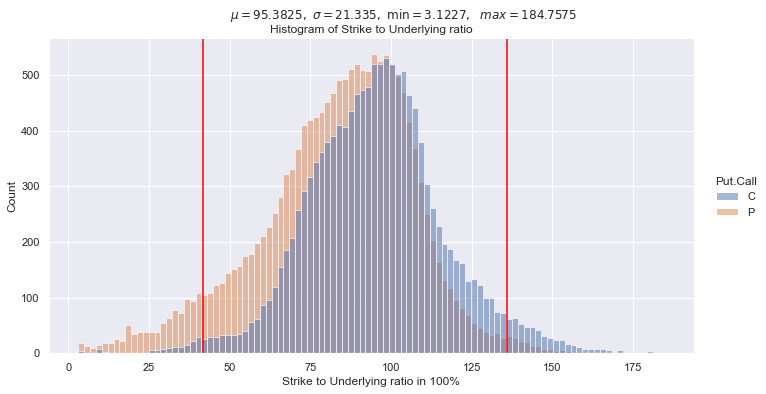

In [9]:
# the histogram of the data
sns.set(rc = {'figure.figsize':(10, 5)})
sns.displot(df, x = temp, hue = "Put.Call", legend = True, height = 5, aspect = 2)
plt.axvline(x = 88.9256 - 2 * 23.5068, color = 'red')
plt.axvline(x = 88.9256 + 2 * 23.5068, color = 'red')
plt.xlabel('Strike to Underlying ratio in 100%')
plt.ylabel('Count')
plt.title('Histogram of Strike to Underlying ratio')
plt.text(50, 600, r'$\mu=95.3825,\ \sigma=21.335, \ \min=3.1227, \ \ max=184.7575$')
plt.show()

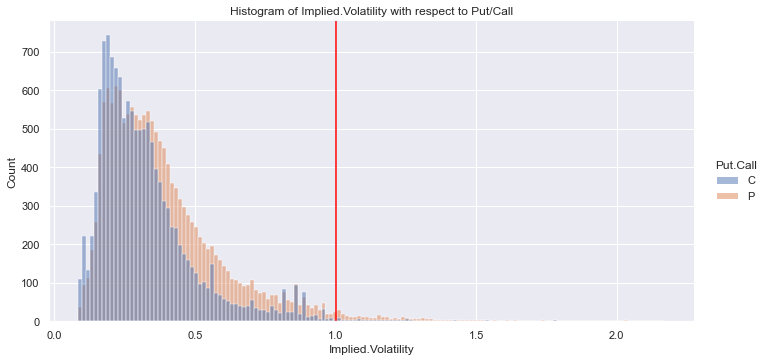

In [11]:
sns.displot(df, x = 'Implied.Volatility', hue = "Put.Call", legend = True, height = 5, aspect = 2)
plt.xlabel('Implied.Volatility')
plt.ylabel('Count')
plt.axvline(x = 1, color = 'red')
plt.title('Histogram of Implied.Volatility with respect to Put/Call')
plt.show()

In [6]:
# Keep the observations within two sd of Strike to Underlying ratio, 
# and keep the observations with implied vol less than 1
idx = np.logical_and(temp > 88.9256 - 2 * 23.5068, temp < 88.9256 + 2 * 23.5068)
idx = np.logical_and(idx, df['Implied.Volatility'] <= 1)

print('We keep {}% of the data.'.format(100 * np.round(np.sum(idx) / len(temp), 4)))
      
df_new = df[idx]
print('The new datafram contains {} observations and {} features.'.format(df_new.shape[0], df_new.shape[1]))

We keep 93.2% of the data.
The new datafram contains 27239 observations and 9 features.


### Call options

In [7]:
# Extract the Call Options
ES_EZ_call = df_new[df_new['Put.Call'] == 'C']

Call_temp = 100 * ES_EZ_call['Strike.Price'].values / ES_EZ_call['futures.price'].values
Call_ITM_idx = Call_temp < 95.2
Call_ATM_idx = np.logical_and(Call_temp <= 103.1, Call_temp >= 95.2)
Call_OTM_idx = Call_temp > 103.1
print('The number of Call options is', ES_EZ_call.shape[0])
print('The number of ITM Call options is', np.sum(Call_ITM_idx))
print('The number of ATM Call options is', np.sum(Call_ATM_idx))
print('The number of OTM Call options is', np.sum(Call_OTM_idx))

The number of Call options is 12794
The number of ITM Call options is 6565
The number of ATM Call options is 2212
The number of OTM Call options is 4017


In [8]:
# Add the moneyness indicator 
Call_moneyness = np.array(['ITM'] * ES_EZ_call.shape[0])
Call_moneyness[Call_ATM_idx] = 'ATM'
Call_moneyness[Call_OTM_idx] = 'OTM'
ES_EZ_call['Moneyness'] = Call_moneyness
ES_EZ_call.head()

,Put.Call,Strike.Price,Settlement,Historical Vol,futures.price,Time.to.maturity,Risk.Free.Rate,Open.Interest,Implied.Volatility,Moneyness
0,C,2200,1059.0,0.008335,3259.0,0.213699,0.0154,826.0,0.338267,ITM
1,C,2250,1009.1,0.008335,3259.0,0.213699,0.0154,728.0,0.326829,ITM
2,C,2270,989.1,0.008335,3259.0,0.213699,0.0154,1.0,0.323456,ITM
3,C,2300,959.2,0.008335,3259.0,0.213699,0.0154,212.0,0.317834,ITM
4,C,2310,949.2,0.008335,3259.0,0.213699,0.0154,42.0,0.314282,ITM


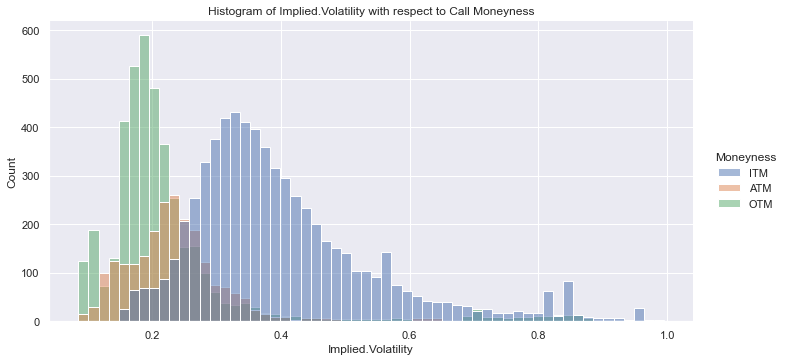

In [9]:
sns.displot(ES_EZ_call, x = 'Implied.Volatility', hue = "Moneyness", legend = True, height = 5, aspect = 2)
plt.xlabel('Implied.Volatility')
plt.ylabel('Count')
plt.title('Histogram of Implied.Volatility with respect to Call Moneyness')
plt.show()

### Put options

In [10]:
# Extract the Call Options
ES_EZ_put = df_new[df_new['Put.Call'] == 'P']

Put_temp = 100 * ES_EZ_put['Strike.Price'].values / ES_EZ_put['futures.price'].values
Put_ITM_idx = Put_temp > 103.1
Put_ATM_idx = np.logical_and(Put_temp <= 103.1, Put_temp >= 95.2)
Put_OTM_idx = Put_temp < 95.2
print('The number of Call options is', ES_EZ_put.shape[0])
print('The number of ITM Call options is', np.sum(Put_ITM_idx))
print('The number of ATM Call options is', np.sum(Put_ATM_idx))
print('The number of OTM Call options is', np.sum(Put_OTM_idx))

The number of Call options is 14445
The number of ITM Call options is 2895
The number of ATM Call options is 2221
The number of OTM Call options is 9329


In [11]:
# Add the moneyness indicator 
Put_moneyness = np.array(['ITM'] * ES_EZ_put.shape[0])
Put_moneyness[Put_ATM_idx] = 'ATM'
Put_moneyness[Put_OTM_idx] = 'OTM'
ES_EZ_put['Moneyness'] = Put_moneyness
ES_EZ_put.head()

,Put.Call,Strike.Price,Settlement,Historical Vol,futures.price,Time.to.maturity,Risk.Free.Rate,Open.Interest,Implied.Volatility,Moneyness
149,P,1400,0.05,0.008335,3259.0,0.213699,0.0154,2519.0,0.537640,OTM
150,P,1450,0.10,0.008335,3259.0,0.213699,0.0154,1440.0,0.543521,OTM
151,P,1500,0.10,0.008335,3259.0,0.213699,0.0154,1670.0,0.521792,OTM
152,P,1550,0.10,0.008335,3259.0,0.213699,0.0154,126.0,0.500767,OTM
153,P,1600,0.15,0.008335,3259.0,0.213699,0.0154,3223.0,0.496338,OTM


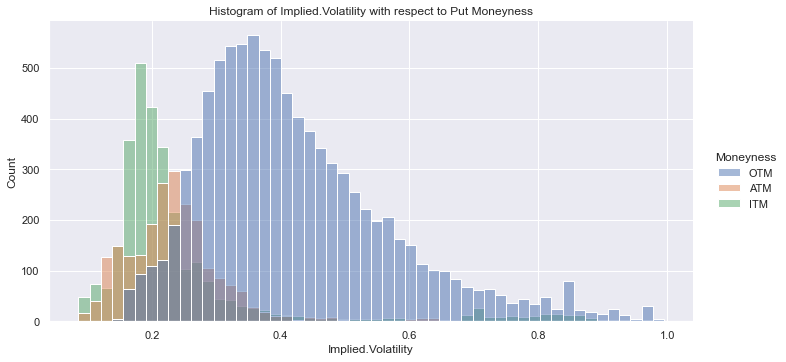

In [12]:
sns.displot(ES_EZ_put, x = 'Implied.Volatility', hue = "Moneyness", legend = True, height = 5, aspect = 2)
plt.xlabel('Implied.Volatility')
plt.ylabel('Count')
plt.title('Histogram of Implied.Volatility with respect to Put Moneyness')
plt.show()

In [13]:
data = pd.concat([ES_EZ_call, ES_EZ_put], axis = 0)
data.head()

,Put.Call,Strike.Price,Settlement,Historical Vol,futures.price,Time.to.maturity,Risk.Free.Rate,Open.Interest,Implied.Volatility,Moneyness
0,C,2200,1059.0,0.008335,3259.0,0.213699,0.0154,826.0,0.338267,ITM
1,C,2250,1009.1,0.008335,3259.0,0.213699,0.0154,728.0,0.326829,ITM
2,C,2270,989.1,0.008335,3259.0,0.213699,0.0154,1.0,0.323456,ITM
3,C,2300,959.2,0.008335,3259.0,0.213699,0.0154,212.0,0.317834,ITM
4,C,2310,949.2,0.008335,3259.0,0.213699,0.0154,42.0,0.314282,ITM


In [14]:
data.shape

(27239, 10)

In [15]:
# save the data to local directory
data.to_csv("/Users/gaojinglun/Desktop/RSG/data/ES_EZ.csv")